# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響

常見的 optimizer 包含

  *  SGD
  *  RMSprop
  *  AdaGrad
  *  Adam



In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


ps GPU 需要關閉，不然會出現error

In [2]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [3]:
train, test = keras.datasets.cifar10.load_data()
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [4]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
"""
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


# RMSprop


In [6]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.4451 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 45us/step - loss: 2.3712 - acc: 0.2119 - val_loss: 1.9419 - val_acc: 0.2909
Epoch 2/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8884 - acc: 0.3194 - val_loss: 1.7770 - val_acc: 0.3523
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7915 - acc: 0.3533 - val_loss: 1.8650 - val_acc: 0.3386
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7147 - acc: 0.3858 - val_loss: 1.7115 - val_acc: 0.3903
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6635 - acc: 0.4051 - val_loss: 1.6798 - val_acc: 0.3905
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6144 - acc: 0.4208 - val_loss: 1.6941 - val_acc: 0.3850
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5780 - acc: 0.4408 - val_loss: 1.5821 - val_acc: 0.4320
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7087 - acc: 0.3942 - val_loss: 1.7081 - val_acc: 0.4032
Epoch 4/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6536 - acc: 0.4115 - val_loss: 1.7054 - val_acc: 0.3872
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6095 - acc: 0.4309 - val_loss: 1.6700 - val_acc: 0.4067
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5707 - acc: 0.4435 - val_loss: 1.5640 - val_acc: 0.4428
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5380 - acc: 0.4568 - val_loss: 1.5744 - val_acc: 0.4364
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5118 - acc: 0.4669 - val_loss: 1.7922 - val_acc: 0.3623
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4847 - acc: 0.4756 - val_loss: 1.5518 - val_acc: 0.4515
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 41us/step - loss: 1.8382 - acc: 0.3580 - val_loss: 1.8225 - val_acc: 0.3698
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.8041 - acc: 0.3710 - val_loss: 1.7921 - val_acc: 0.3807
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7762 - acc: 0.3805 - val_loss: 1.7728 - val_acc: 0.3790
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7533 - acc: 0.3895 - val_loss: 1.7555 - val_acc: 0.3892
Epoch 8/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7329 - acc: 0.3980 - val_loss: 1.7302 - val_acc: 0.3994
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7141 - acc: 0.4037 - val_loss: 1.7228 - val_acc: 0.3985
Epoch 10/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6973 - acc: 0.4094 - val_loss: 1.6959 - val_acc: 0.4139
Epoch 11/50
50000/50000 [==========================

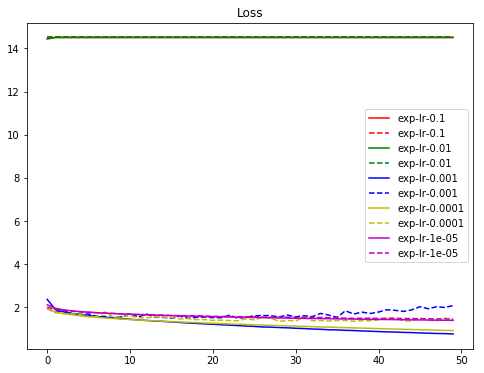

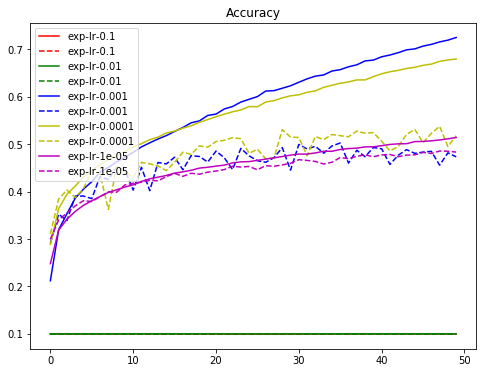

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


# Adagrad


In [8]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 45us/step - loss: 14.4382 - acc: 0.0993 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 45us/step - loss: 1.9804 - acc: 0.2851 - val_loss: 1.8838 - val_acc: 0.3174
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7933 - acc: 0.3643 - val_loss: 1.8180 - val_acc: 0.3519
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7213 - acc: 0.3933 - val_loss: 1.7227 - val_acc: 0.3853
Epoch 4/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6717 - acc: 0.4106 - val_loss: 1.6977 - val_acc: 0.3958
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.6357 - acc: 0.4253 - val_loss: 1.6385 - val_acc: 0.4111
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.6065 - acc: 0.4375 - val_loss: 1.6828 - val_acc: 0.4148
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5816 - acc: 0.4442 - val_loss: 1.5970 - val_acc: 0.4317
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8793 - acc: 0.3528 - val_loss: 1.8634 - val_acc: 0.3621
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8521 - acc: 0.3590 - val_loss: 1.8421 - val_acc: 0.3647
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8319 - acc: 0.3668 - val_loss: 1.8235 - val_acc: 0.3696
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8160 - acc: 0.3705 - val_loss: 1.8113 - val_acc: 0.3726
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.8034 - acc: 0.3757 - val_loss: 1.8001 - val_acc: 0.3789
Epoch 8/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.7923 - acc: 0.3783 - val_loss: 1.7897 - val_acc: 0.3808
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.7831 - acc: 0.3819 - val_loss: 1.7810 - val_acc: 0.3829
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 39us/step - loss: 2.1593 - acc: 0.2365 - val_loss: 2.1492 - val_acc: 0.2475
Epoch 5/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1424 - acc: 0.2493 - val_loss: 2.1340 - val_acc: 0.2560
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1281 - acc: 0.2572 - val_loss: 2.1210 - val_acc: 0.2626
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1158 - acc: 0.2626 - val_loss: 2.1098 - val_acc: 0.2664
Epoch 8/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1052 - acc: 0.2685 - val_loss: 2.1000 - val_acc: 0.2712
Epoch 9/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0958 - acc: 0.2731 - val_loss: 2.0915 - val_acc: 0.2747
Epoch 10/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.0877 - acc: 0.2754 - val_loss: 2.0840 - val_acc: 0.2779
Epoch 11/50
50000/50000 [==========================

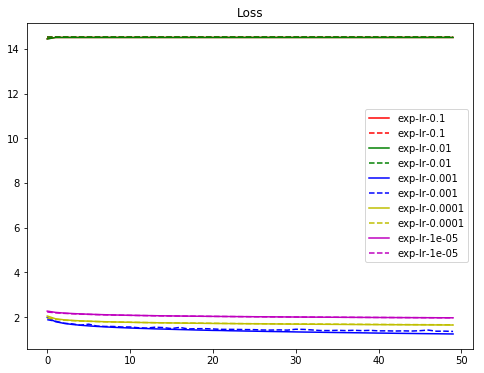

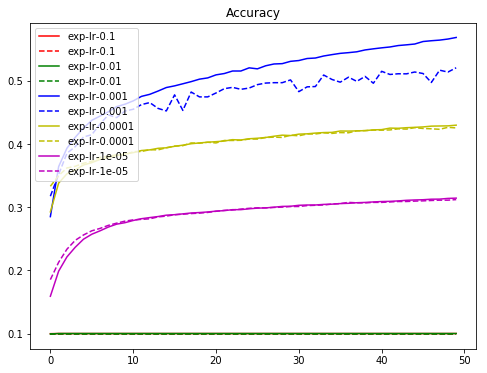

In [9]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


# Adam


In [10]:
results = {}

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.4187 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 47us/step - loss: 1.9170 - acc: 0.3054 - val_loss: 1.7869 - val_acc: 0.3604
Epoch 2/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6867 - acc: 0.3961 - val_loss: 1.6380 - val_acc: 0.4201
Epoch 3/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6095 - acc: 0.4246 - val_loss: 1.5676 - val_acc: 0.4403
Epoch 4/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5459 - acc: 0.4465 - val_loss: 1.5393 - val_acc: 0.4543
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.5019 - acc: 0.4676 - val_loss: 1.5028 - val_acc: 0.4633
Epoch 6/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4659 - acc: 0.4759 - val_loss: 1.4667 - val_acc: 0.4801
Epoch 7/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.4341 - acc: 0.4886 - val_loss: 1.4704 - val_acc: 0.4760
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6280 - acc: 0.4285 - val_loss: 1.6028 - val_acc: 0.4345
Epoch 4/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.5737 - acc: 0.4453 - val_loss: 1.5593 - val_acc: 0.4493
Epoch 5/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.5334 - acc: 0.4608 - val_loss: 1.5270 - val_acc: 0.4623
Epoch 6/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4924 - acc: 0.4735 - val_loss: 1.5344 - val_acc: 0.4528
Epoch 7/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4620 - acc: 0.4837 - val_loss: 1.4852 - val_acc: 0.4700
Epoch 8/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4300 - acc: 0.4957 - val_loss: 1.4680 - val_acc: 0.4810
Epoch 9/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.4077 - acc: 0.5055 - val_loss: 1.4803 - val_acc: 0.4763
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 2s 42us/step - loss: 1.8312 - acc: 0.3618 - val_loss: 1.8202 - val_acc: 0.3543
Epoch 5/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7958 - acc: 0.3749 - val_loss: 1.7862 - val_acc: 0.3761
Epoch 6/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7657 - acc: 0.3876 - val_loss: 1.7590 - val_acc: 0.3896
Epoch 7/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.7410 - acc: 0.3943 - val_loss: 1.7363 - val_acc: 0.3916
Epoch 8/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.7188 - acc: 0.4017 - val_loss: 1.7151 - val_acc: 0.3998
Epoch 9/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.6972 - acc: 0.4087 - val_loss: 1.6987 - val_acc: 0.4041
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.6789 - acc: 0.4148 - val_loss: 1.6781 - val_acc: 0.4126
Epoch 11/50
50000/50000 [==========================

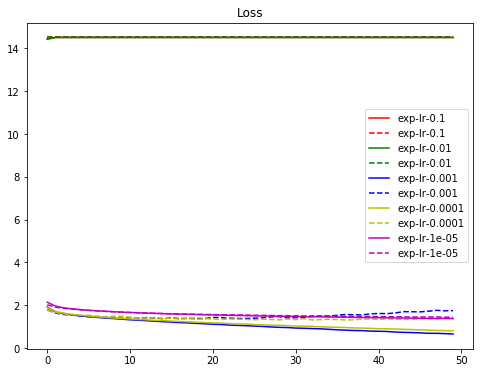

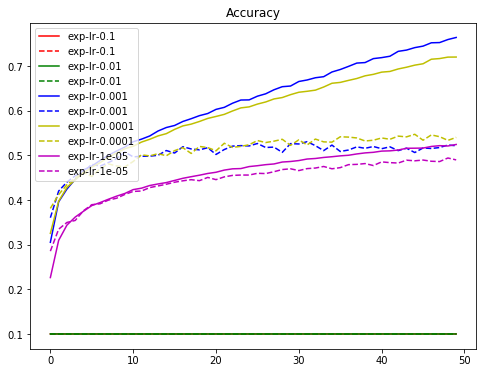

In [11]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# SGD

In [12]:
results = {}


for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "SGD exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.8194 - acc: 0.3489 - val_loss: 1.6572 - val_acc: 0.4222
Epoch 2/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5951 - acc: 0.4353 - val_loss: 1.5903 - val_acc: 0.4311
Epoch 3/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.5062 - acc: 0.4651 - val_loss: 1.5068 - val_acc: 0.4671
Epoch 4/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.4456 - acc: 0.4884 - val_loss: 1.5594 - val_acc: 0.4540
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3939 - acc: 0.5043 - val_loss: 1.4753 - val_acc: 0.4748
Epoch 6/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.3590 - acc: 0.5175 - val_loss: 1.4130 - val_acc: 0.4990
Epoch 7/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.3209 - acc: 0.5314 - val_loss: 1.6087 - val_acc

50000/50000 [==============================] - 2s 37us/step - loss: 1.7958 - acc: 0.3740 - val_loss: 1.7496 - val_acc: 0.3888
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7110 - acc: 0.4020 - val_loss: 1.6743 - val_acc: 0.4151
Epoch 4/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6518 - acc: 0.4210 - val_loss: 1.6271 - val_acc: 0.4331
Epoch 5/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.6048 - acc: 0.4395 - val_loss: 1.5982 - val_acc: 0.4346
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5662 - acc: 0.4537 - val_loss: 1.5620 - val_acc: 0.4477
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5334 - acc: 0.4640 - val_loss: 1.5478 - val_acc: 0.4512
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5047 - acc: 0.4747 - val_loss: 1.5131 - val_acc: 0.4666
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9997 - acc: 0.3055 - val_loss: 1.9745 - val_acc: 0.3131
Epoch 5/50
50000/50000 [==============================] - 2s 40us/step - loss: 1.9530 - acc: 0.3199 - val_loss: 1.9356 - val_acc: 0.3283
Epoch 6/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9177 - acc: 0.3315 - val_loss: 1.9057 - val_acc: 0.3354
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8901 - acc: 0.3397 - val_loss: 1.8819 - val_acc: 0.3449
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8679 - acc: 0.3478 - val_loss: 1.8634 - val_acc: 0.3492
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.8495 - acc: 0.3540 - val_loss: 1.8459 - val_acc: 0.3571
Epoch 10/50
50000/50000 [==============================] - 2s 42us/step - loss: 1.8335 - acc: 0.3601 - val_loss: 1.8307 - val_acc: 0.3619
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 2s 39us/step - loss: 2.2425 - acc: 0.1949 - val_loss: 2.2344 - val_acc: 0.2068
Epoch 6/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.2297 - acc: 0.2060 - val_loss: 2.2217 - val_acc: 0.2156
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2171 - acc: 0.2156 - val_loss: 2.2092 - val_acc: 0.2256
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.2047 - acc: 0.2238 - val_loss: 2.1968 - val_acc: 0.2310
Epoch 9/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1925 - acc: 0.2305 - val_loss: 2.1848 - val_acc: 0.2382
Epoch 10/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1807 - acc: 0.2354 - val_loss: 2.1730 - val_acc: 0.2447
Epoch 11/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1692 - acc: 0.2404 - val_loss: 2.1617 - val_acc: 0.2499
Epoch 12/50
50000/50000 [=========================

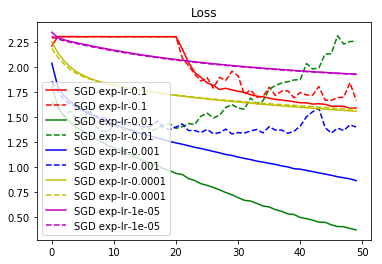

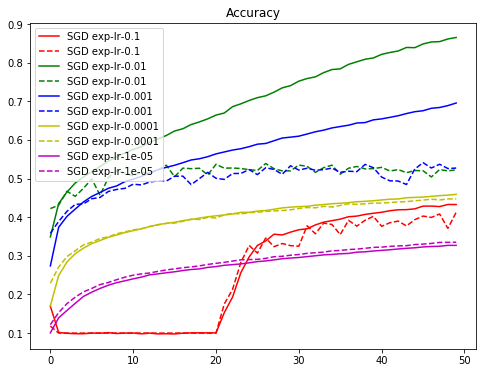

In [13]:
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()